In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

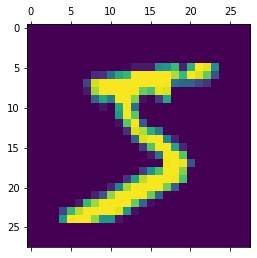

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
 X_train.shape

(60000, 28, 28)

### Scaling the Dataset

In [11]:
X_train = X_train/255
X_test = X_test/255

### Flattening the Array (2D to 1D Array)

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.4865 - acc: 0.87830s - loss: 0.5174 - acc
Epoch 2/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3059 - acc: 0.91580s - loss: 0.3067 - acc: 0.9
Epoch 3/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2856 - acc: 0.92180s - loss: 0.2867 - acc: 0.
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2742 - acc: 0.92381s - loss: 0.279
Epoch 5/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2681 - acc: 0.92621s - loss: 0.2707 - acc - ETA: 0s - loss: 0.2


In [15]:
model.evaluate(X_test_flattened, y_test)

10000/10000 [==============================] - 0s 17us/sample - loss: 0.2708 - acc: 0.9264


[0.2708463664293289, 0.9264]

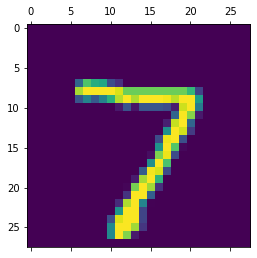

In [16]:
plt.matshow(X_test[0])

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.9639730e-05, 0.0000000e+00, 3.0487776e-05, 1.4394432e-02,
       7.4505806e-07, 1.0216236e-04, 0.0000000e+00, 7.0799601e-01,
       7.9900026e-05, 8.7597966e-04], dtype=float32)

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
cm = confusion_matrix(y_test,y_predicted_labels)
cm

array([[ 965,    0,    2,    1,    0,    6,    2,    2,    2,    0],
       [   0, 1107,    3,    2,    0,    2,    4,    1,   16,    0],
       [   7,    8,  918,   17,    6,    6,   12,   10,   44,    4],
       [   5,    0,   13,  910,    1,   39,    2,   10,   23,    7],
       [   2,    1,    4,    1,  913,    0,    9,    4,   10,   38],
       [   7,    1,    3,   21,    6,  808,   10,    3,   27,    6],
       [  11,    3,    7,    1,    8,   23,  900,    2,    3,    0],
       [   3,    5,   23,    4,    6,    1,    0,  944,    4,   38],
       [   7,    5,    6,   16,    9,   36,    7,    8,  875,    5],
       [  11,    7,    1,   11,   24,   10,    0,   14,    7,  924]],
      dtype=int64)

Text(69.0, 0.5, 'Truth')

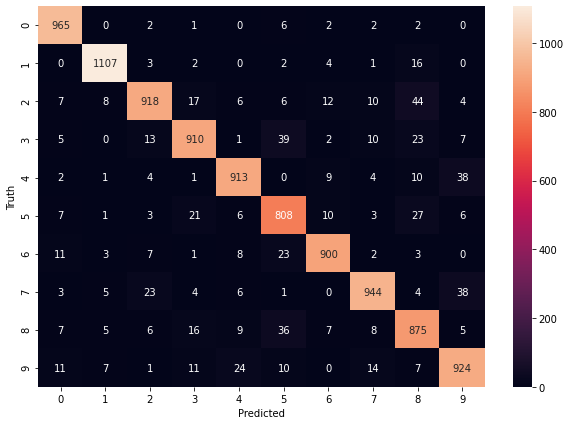

In [21]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using hidden layer

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2922 - acc: 0.9181
Epoch 2/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1380 - acc: 0.9596
Epoch 3/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1002 - acc: 0.9703
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0786 - acc: 0.9763
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0630 - acc: 0.9807


In [23]:
model.evaluate(X_test_flattened, y_test)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.0913 - acc: 0.9739


[0.09132422570884227, 0.9739]

Text(69.0, 0.5, 'Truth')

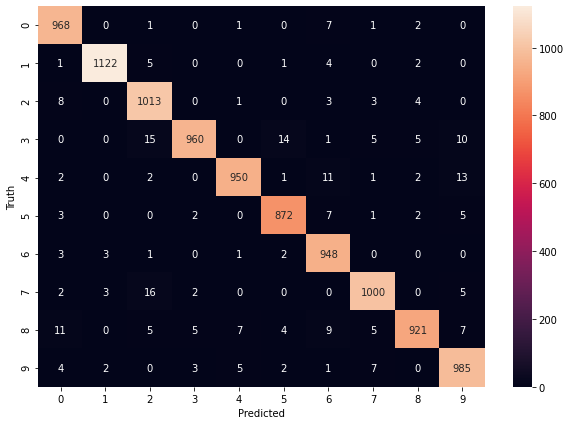

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = confusion_matrix(y_test,y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')